# PyTorch 基础 :数据的加载和预处理
PyTorch通过torch.utils.data对一般常用的数据加载进行了封装，可以很容易地实现多线程数据预读和批量加载。
并且torchvision已经预先实现了常用图像数据集，包括前面使用过的CIFAR-10，ImageNet、COCO、MNIST、LSUN等数据集，可通过torchvision.datasets方便的调用

In [7]:
# 首先要引入相关的包
import torch
#打印一下版本
torch.__version__

'1.0.1'

## Dataset
Dataset是一个抽象类, 为了能够方便的读取，需要将要使用的数据包装为Dataset类。
自定义的Dataset需要继承它并且实现两个成员方法：
1. `__getitem__()` 该方法定义用索引(`0` 到 `len(self)`)获取一条数据或一个样本
2. `__len__()` 该方法返回数据集的总长度

下面我们使用kaggle上的一个竞赛[bluebook for bulldozers](https://www.kaggle.com/c/bluebook-for-bulldozers/data)自定义一个数据集，为了方便介绍，我们使用里面的数据字典来做说明（因为条数少）

In [8]:
#引用
from torch.utils.data import Dataset
import pandas as pd

In [9]:
#定义一个数据集
class BulldozerDataset(Dataset):
    """ 数据集演示 """
    def __init__(self, csv_file):
        """实现初始化方法，在初始化的时候将数据读载入"""
        self.df=pd.read_csv(csv_file)
    def __len__(self):
        '''
        返回df的长度
        '''
        return len(self.df)
    def __getitem__(self, idx):
        '''
        根据 idx 返回一行数据
        '''
        return self.df.iloc[idx].SalePrice

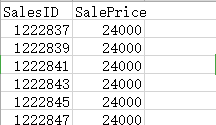

至此，我们的数据集已经定义完成了，我们可以实例话一个对象访问他

In [19]:
ds_demo= BulldozerDataset('median_benchmark.csv')

我们可以直接使用如下命令查看数据集数据


In [20]:
#实现了 __len__ 方法所以可以直接使用len获取数据总数
len(ds_demo)

11573

In [21]:
#用索引可以直接访问对应的数据, 对应 __getitem__ 方法
ds_demo[0]

24000.0

自定义的数据集已经创建好了，下面我们使用官方提供的数据载入器，读取数据
## Datalorder
DataLoader为我们提供了对Dataset的读取操作，常用参数有：batch_size(每个batch的大小), shuffle(是否进行shuffle操作), num_workers(加载数据的时候使用几个子进程)，下面做一个简单的操作

In [22]:
dl = torch.utils.data.DataLoader(ds_demo, batch_size=10, shuffle=True, num_workers=0)

DataLoader返回的是一个可迭代对象，我们可以使用迭代器分次获取数据

In [28]:
idata=iter(dl)
print(next(idata))

tensor([24000., 24000., 24000., 24000., 24000., 24000., 24000., 24000., 24000.,
        24000.], dtype=torch.float64)


常见的用法是使用for循环对其进行遍历

In [29]:
for i, data in enumerate(dl):
    print(i)
    print(data)
    # 为了节约空间, 这里只循环一遍
    break

0
tensor([24000., 24000., 24000., 24000., 24000., 24000., 24000., 24000., 24000.,
        24000.], dtype=torch.float64)


我们已经可以通过dataset定义数据集，并使用Datalorder载入和遍历数据集，除了这些以外，PyTorch还提供能torcvision的计算机视觉扩展包，里面封装了
## torchvision 包
torchvision 是PyTorch中专门用来处理图像的库，PyTorch官网的安装教程中最后的pip install torchvision 就是安装这个包。

### torchvision.datasets
torchvision.datasets 可以理解为PyTorch团队自定义的dataset，这些dataset帮我们提前处理好了很多的图片数据集，我们拿来就可以直接使用：
- MNIST
- COCO
- Captions
- Detection
- LSUN
- ImageFolder
- Imagenet-12
- CIFAR
- STL10
- SVHN
- PhotoTour
我们可以直接使用，示例如下：

In [30]:
import torchvision.datasets as datasets
trainset = datasets.MNIST(root='./data', # 表示 MNIST 数据的加载的目录
                                      train=True,  # 表示是否加载数据库的训练集，false的时候加载测试集
                                      download=True, # 表示是否自动下载 MNIST 数据集
                                      transform=None) # 表示是否需要对数据进行预处理，none为不进行预处理


### torchvision.models
torchvision不仅提供了常用图片数据集，还提供了训练好的模型，可以加载之后，直接使用，或者在进行迁移学习
torchvision.models模块的 子模块中包含以下模型结构。
- AlexNet
- VGG
- ResNet
- SqueezeNet
- DenseNet

In [31]:
#我们直接可以使用训练好的模型，当然这个与datasets相同，都是需要从服务器下载的
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)

### torchvision.transforms
transforms 模块提供了一般的图像转换操作类，用作数据处理和数据增强

In [32]:
from torchvision import transforms as transforms
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  #先四周填充0，在把图像随机裁剪成32*32
    transforms.RandomHorizontalFlip(),  #图像一半的概率翻转，一半的概率不翻转
    transforms.RandomRotation((-45,45)), #随机旋转
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.229, 0.224, 0.225)), #R,G,B每层的归一化用到的均值和方差
])

肯定有人会问：(0.485, 0.456, 0.406), (0.2023, 0.1994, 0.2010) 这几个数字是什么意思？

官方的这个帖子有详细的说明:
https://discuss.pytorch.org/t/normalization-in-the-mnist-example/457/21
这些都是根据ImageNet训练的归一化参数，可以直接使用，我们认为这个是固定值就可以

我们已经完成了Python的基本内容的介绍，下面我们要介绍神经网络的理论基础，里面的公式等内容我们都使用PyTorch来实现